In [11]:
# from methods import OA_SA, VA_SA
import numpy as np
from envs import DynamicQVRPEnv
from methods import Agent, GreedyAgent, MSAAgent, OfflineAgent
from experiments import run_agent
import matplotlib.pyplot as plt

In [12]:
# env_configs = {
#         "K" : 50,
#         "Q" : 100, 
#         "DoD" : 0.5,
#         "vehicle_capacity" : 25,
#         "re_optimization" : False,
#         "costs_KM" : [1, 1],
#         "emissions_KM" : [.1, .3]
#     }

# env_configs = {
#             "K" : 50,
#             "Q" : 70, 
#             "DoD" : 0.7,
#             "vehicle_capacity" : 25,
#             "re_optimization" : True,
#             "costs_KM" : [1, 1],
#             "emissions_KM" : [.1, .3],
#             "n_scenarios" : 500
#         }

In [13]:
import pickle

# file = "res_wReOpt_500"
# file = "res_TSP"
file = "res_TSP_fullDynamic"
with open(f'results/{file}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_SL.pkl', "rb") as f:
    res_SL = pickle.load(f)
    
with open(f'results/{file}/res_RL.pkl', "rb") as f:
    res_RL = pickle.load(f)

with open(f'results/{file}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

In [4]:
print(env_configs)
res_greedy.keys()

{'K': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 30, 're_optimization': False, 'costs_KM': [1], 'emissions_KM': [0.3], 'n_scenarios': 500}


dict_keys(['rs', 'actions', 'infos'])

Text(0.5, 1.0, 'online/offline ratio')

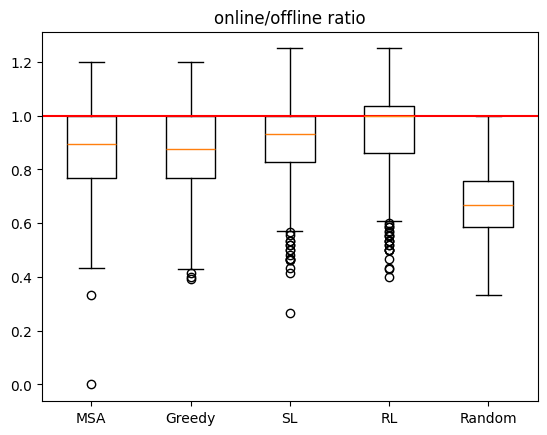

In [14]:
# gap = [
#     res_offline["rs"]/res_MSA["rs"] -1, res_offline["rs"]/res_greedy["rs"]-1, res_offline["rs"]/res_random["rs"]-1
# ]

gap = [
    res_MSA["rs"]/res_offline["rs"],
    res_greedy["rs"]/res_offline["rs"],
    res_SL["rs"]/res_offline["rs"],
    res_RL["rs"]/res_offline["rs"],
    res_random["rs"]/res_offline["rs"],
]

plt.boxplot(
    gap,
    tick_labels=[
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("online/offline ratio")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

Text(0.5, 1.0, 'online/offline ratio')

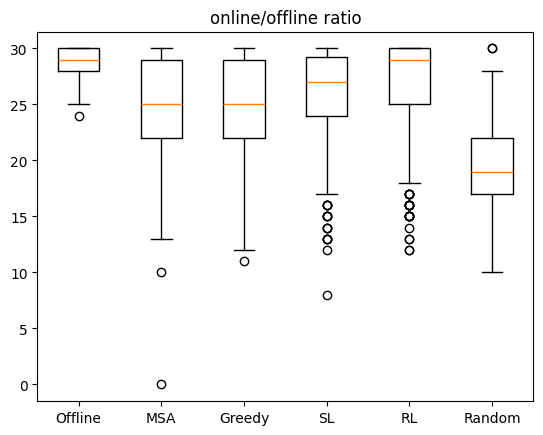

In [6]:
qs = [
    res_offline["rs"],
    res_MSA["rs"],
    res_greedy["rs"],
    res_SL["rs"],
    res_RL["rs"],
    res_random["rs"],
]

plt.boxplot(
    qs,
    tick_labels=[
        "Offline",  
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
# plt.hlines(1, 0.5, len(qs)+.5, colors='red')
plt.title("online/offline ratio")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

Text(0.5, 1.0, 'Mean rewards by methods')

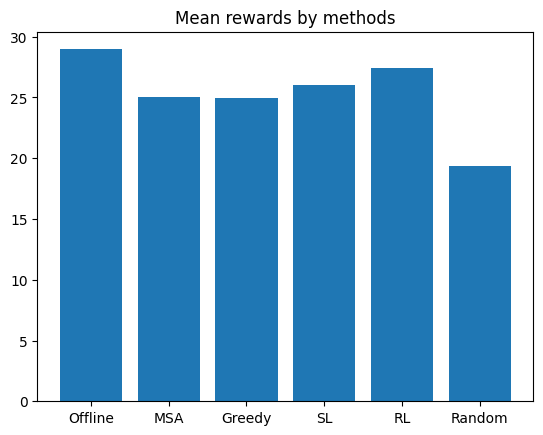

In [10]:
# gap = [
#     res_offline["rs"]/res_MSA["rs"] -1, res_offline["rs"]/res_greedy["rs"]-1, res_offline["rs"]/res_random["rs"]-1
# ]

gap = [
    res_offline["rs"].mean(),
    res_MSA["rs"].mean(),
    res_greedy["rs"].mean(),
    res_SL["rs"].mean(),
    res_RL["rs"].mean(),
    res_random["rs"].mean(),
]

plt.bar(
    height=gap,
    x=[
        "Offline", 
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
# plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("Mean rewards by methods")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

In [25]:
print(gap)

[np.float64(28.966), np.float64(25.06), np.float64(24.954), np.float64(25.996), np.float64(19.4)]


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:2: RuntimeWarning: invalid value encountered in divide
  res_MSA["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:3: RuntimeWarning: divide by zero encountered in divide
  res_greedy["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:4: RuntimeWarning: divide by zero encountered in divide
  res_SL["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:5: RuntimeWarning: divide by zero encountered in divide
  res_RL["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:6: RuntimeWarning: divide by zero encountered in divide
  res_random["rs"]/res_MSA["rs"],


Text(0.5, 1.0, 'methods/MSA ratio')

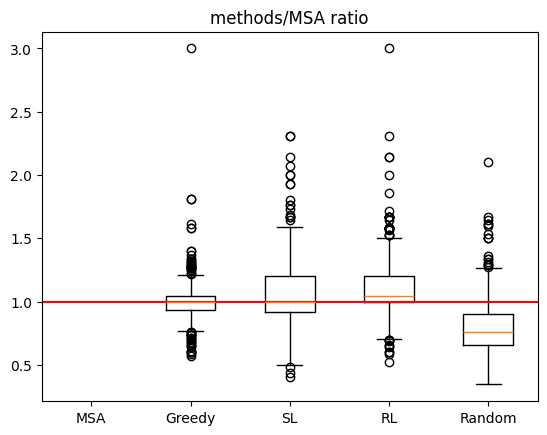

In [12]:
gap = [
    res_MSA["rs"]/res_MSA["rs"],
    res_greedy["rs"]/res_MSA["rs"],
    res_SL["rs"]/res_MSA["rs"],
    res_RL["rs"]/res_MSA["rs"],
    res_random["rs"]/res_MSA["rs"],
]

plt.boxplot(
    gap,
    tick_labels=[
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("methods/MSA ratio")

Text(0.5, 1.0, 'methods/greedy ratio')

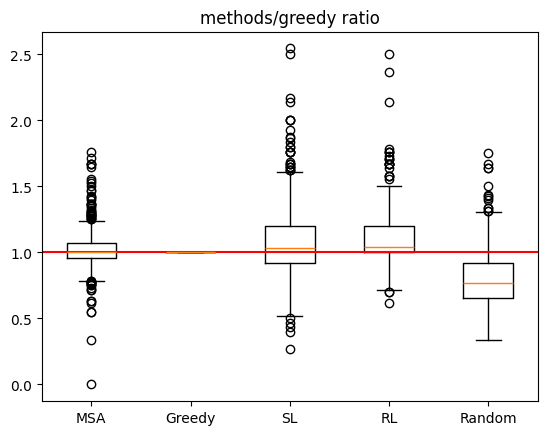

In [13]:
gap = [
    res_MSA["rs"]/res_greedy["rs"],
    res_greedy["rs"]/res_greedy["rs"],
    res_SL["rs"]/res_greedy["rs"],
    res_RL["rs"]/res_greedy["rs"],
    res_random["rs"]/res_greedy["rs"],
]

plt.boxplot(
    gap,
    tick_labels=[
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("methods/greedy ratio")

In [ ]:
np.where(res_MSA["rs"]/res_offline["rs"] > 1)

(array([181, 191]),)

In [40]:
res_SL["actions"]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
 [1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 [1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],


In [13]:
res_offline["rs"].mean()

np.float64(21.206)

In [ ]:
# r_offline, *_ = run_agent(
#     OfflineAgent,
#     env_configs,
#     episodes = 200,
#     agent_configs={"n_workers": 10},
#     save_results=True,
#     title = 'res_offline'
# )

100%|██████████| 200/200 [20:41<00:00,  6.21s/it]


In [4]:
r_offline = np.load('results/r_offline.npy')

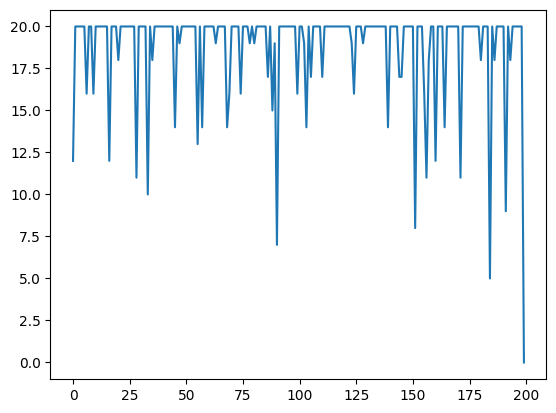

In [9]:
plt.plot(res_MSA["rs"])

In [3]:
r_greedy_woRO, *_ = run_agent(
    GreedyAgent,
    env_configs,
    episodes = 200,
    save_results=True,
    title = 'res_greedy'
)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:08<00:00, 22.84it/s]


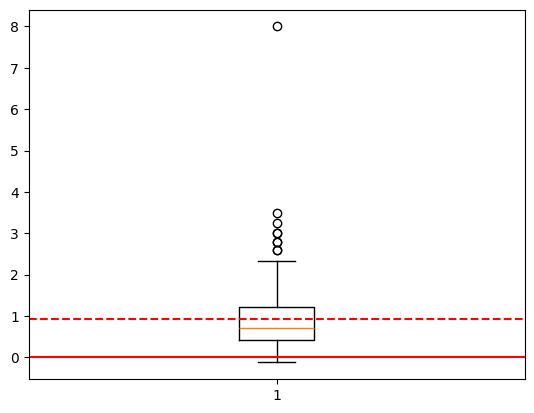

In [7]:
plt.boxplot(r_offline/r_greedy_woRO-1)
plt.hlines(0, 0.5, 1.5, colors='red')
plt.hlines(np.mean(r_offline/r_greedy_woRO-1), 0.5, 1.5, colors='red', linestyles='--')

In [4]:
r_random_woRO, *_ = run_agent(
    Agent,
    env_configs,
    episodes = 200,
    save_results=True,
    title = 'res_random'
)

# plt.boxplot(r_offline/r_random_woRO-1)
# plt.hlines(0, 0.5, 1.5, colors='red')
# plt.hlines(np.mean(r_offline/r_random_woRO-1), 0.5, 1.5, colors='red', linestyles='--')

100%|██████████| 200/200 [00:06<00:00, 31.47it/s]


In [6]:
r_MSA_woRO, *_ = run_agent(
    MSAAgent,
    env_configs,
    episodes=200,
    agent_configs=dict(n_sample=21, parallelize = True),
    save_results=True,
    title = 'res_MSA'
)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [10:06<00:00,  3.03s/it]


In [ ]:
plt.boxplot(
    [r_offline/r_MSA_woRO -1, r_offline/r_greedy_woRO-1, r_offline/r_random_woRO-1],
    labels=["MSA", "Greedy", "Random"],
)
plt.hlines(0, 0.5, 2.5, colors='red')
plt.title("offline/online gap")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

NameError: name 'r_MSA_woRO' is not defined

In [ ]:
r_MSA_woRO/r_offline

array([0.44444444, 0.38888889, 0.78947368, 0.44444444, 0.33333333,
       0.7       , 0.23529412, 0.94736842, 0.5       , 0.81818182])

In [ ]:
r_greedy_woRO/r_offline

array([0.44444444, 0.11111111, 0.73684211, 0.55555556, 0.5       ,
       0.85      , 0.82352941, 0.84210526, 0.78571429, 1.09090909])

In [ ]:
env = DynamicQVRPEnv(50, 100, DoD=0.5, vehicle_capacity=25, re_optimization=True,
                     costs_KM=[1, 1], emissions_KM=[.1, .3]
)
agent = GreedyAgent(env)
r_wRO, *_ = agent.run(10)

100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


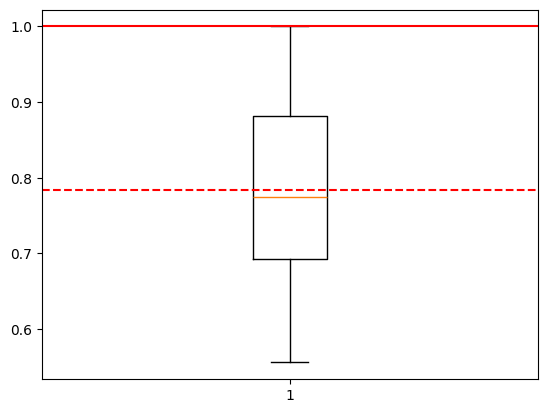

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(r_woRO/r_wRO)
plt.hlines(1, 0.5, 1.5, colors='red')
plt.hlines(np.mean(r_woRO/r_wRO), 0.5, 1.5, colors='red', linestyles='--')

In [ ]:
print(r_wRO)

[ 9. 14. 16. 15. 13. 19. 13. 16. 13.  9.]


[[ 0 22 23  5 24  9 20 11 19 26  4 10  6 13 18 15 12  1 25 17 14  3  7  2
  21  0  0]
 [ 0 16  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]]
[]
26
(2, 27)


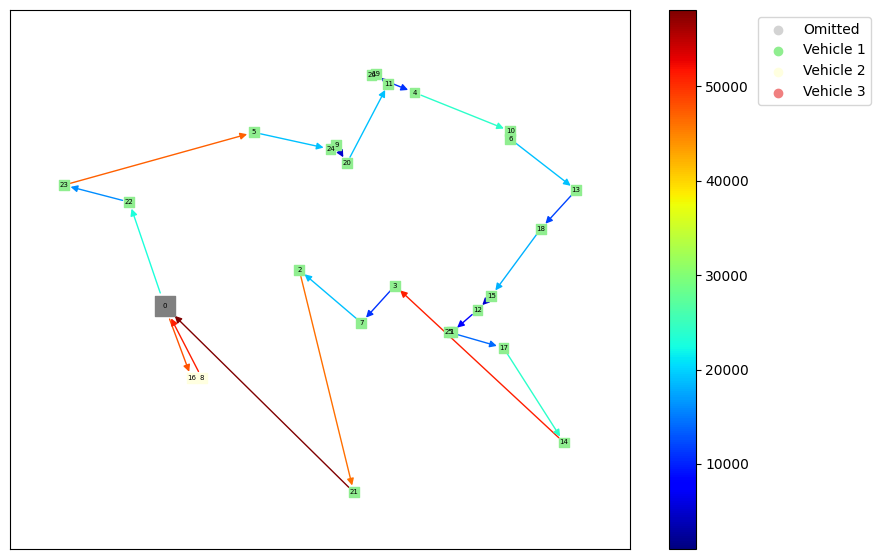

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (-1.173, 46.162) node[gray] (0){0}\n        (4.949, 45.702) node[lightgreen] (1){1}\n        (1.694, 46.803) node[lightgreen] (2){2}\n        (3.736, 46.523) node[lightgreen] (3){3}\n        (4.153, 49.926) node[lightgreen] (4){4}\n        (0.726, 49.225) node[lightgreen] (5){5}\n        (6.196, 49.108) node[lightgreen] (6){6}\n        (3.019, 45.868) node[lightgreen] (7){7}\n        (-0.386, 44.901) node[lightyellow] (8){8}\n        (2.487, 49.0) node[lightgreen] (9){9}\n        (6.196, 49.247) node[lightgreen] (10){10}\n        (3.595, 50.082) node[lightgreen] (11){11}\n        (5.493, 46.093) node[lightgreen] (12){12}\n        (7.6, 48.208) node[lightgreen] (13){13}\n        (7.337, 43.758) node[lightgreen] (14){14}\n        (5.788, 46.339) node[lightgreen] (15){15}\n        (-0.6, 44.889) node[lightyellow] (16){16}\n        (6.0

In [ ]:
env.step(1)
print(env.routes)
print(env.omitted)
print(env.j)
env.render()